In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youtube-trending-video-dataset/MX_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/GB_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/BR_category_id.json
/kaggle/input/youtube-trending-video-dataset/FR_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/IN_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/MX_category_id.json
/kaggle/input/youtube-trending-video-dataset/GB_category_id.json
/kaggle/input/youtube-trending-video-dataset/US_category_id.json
/kaggle/input/youtube-trending-video-dataset/BR_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/RU_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/IN_category_id.json
/kaggle/input/youtube-trending-video-dataset/KR_category_id.json
/kaggle/input/youtube-trending-video-dataset/DE_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/RU_category_id.json
/kaggle/input/youtube-trend

# **Set up libraries**

In [2]:
#load libraries 

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import geopy.distance
from math import radians,cos,sin,asin,sqrt
import folium
import datetime
from folium.plugins import HeatMap
from scipy.stats import ttest_ind

matplotlib.rcParams.update({'font.size': 12})

# **Load data**

In [3]:
!ls ../input/youtube-trending-video-dataset/US_youtube_trending_data.csv

../input/youtube-trending-video-dataset/US_youtube_trending_data.csv


In [4]:
us_data = pd.read_csv('../input/youtube-trending-video-dataset/US_youtube_trending_data.csv')

# ****Explore Data****

In [5]:
#read the first 5 rows
us_data.head(5)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [6]:
#read the last 5 rows
us_data.tail(5)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
118186,dUUaGEhFQSw,Minecraft 1.19 All Copper Horn & Goat Horn Sou...,2022-03-16T21:20:08Z,UCL5W9kuKIQtXEVAxSadB2BQ,xisumatwo,20,2022-03-21T00:00:00Z,copper horn|goat horn|copper horn sound|goat h...,213658,12892,0,1563,https://i.ytimg.com/vi/dUUaGEhFQSw/default.jpg,False,False,Minecraft 1.19 The Wild Update Playlist ► http...
118187,L4KWhKY85cY,Extreme Try Not To Laugh Challenge!,2022-03-14T20:00:04Z,UCUaT_39o1x6qWjz7K2pWcgw,Beast Reacts,24,2022-03-21T00:00:00Z,life hacks|crafts|slime|do it yourself|diy|lif...,8534492,319166,0,8466,https://i.ytimg.com/vi/L4KWhKY85cY/default.jpg,False,False,"Chris just won $10,000 BUT everytime he laughs..."
118188,prSC34pzIYA,Which Friends voice/face suits me? #shorts #fr...,2022-03-18T00:21:33Z,UCr-QB2DohAszkLY-W-aC0uw,Holly Auna,24,2022-03-21T00:00:00Z,[None],392311,18496,0,374,https://i.ytimg.com/vi/prSC34pzIYA/default.jpg,False,False,NaN
118189,FmjY0ZAJKZA,If you laugh that means you lied,2022-03-16T18:34:18Z,UCxd6ifFZycyUB45d2t9VPQw,TheMermaidscales,24,2022-03-21T00:00:00Z,[None],3174757,331988,0,1981,https://i.ytimg.com/vi/FmjY0ZAJKZA/default.jpg,False,False,NaN
118190,0PERJmVTKTI,Gabby Won't Even Let Clayton Echard Walk Her O...,2022-03-16T05:00:00Z,UCVc-qp-0L4zjR_QUEr0SAHw,Bachelor Nation on ABC,24,2022-03-21T00:00:00Z,bachelor|bachelorettes|dating|gabby|goodbye|ho...,166136,2504,0,526,https://i.ytimg.com/vi/0PERJmVTKTI/default.jpg,False,False,After Bachelor Clayton Echard convinced Gabby ...


The dataset includes all of the videos trending from 2020-08-12 to today's date (2022-03-05)

Hence, let's use only data from 2021-01-01 to 2021-12-31 to have a better year-round analysis.

In [7]:
type(us_data.loc[2,'publishedAt'])

str

In [8]:
type(us_data.loc[6,'trending_date'])

str

**The type of both of publishAt and trending_date are str.**

Convert them into date/time before making any changes

In [9]:
us_data['publishedAt'] = pd.to_datetime(us_data['publishedAt'])

In [10]:
us_data['trending_date'] = pd.to_datetime(us_data['trending_date'])

In [11]:
us_data

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12 00:00:00+00:00,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12 00:00:00+00:00,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12 00:00:00+00:00,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12 00:00:00+00:00,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12 00:00:00+00:00,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118186,dUUaGEhFQSw,Minecraft 1.19 All Copper Horn & Goat Horn Sou...,2022-03-16 21:20:08+00:00,UCL5W9kuKIQtXEVAxSadB2BQ,xisumatwo,20,2022-03-21 00:00:00+00:00,copper horn|goat horn|copper horn sound|goat h...,213658,12892,0,1563,https://i.ytimg.com/vi/dUUaGEhFQSw/default.jpg,False,False,Minecraft 1.19 The Wild Update Playlist ► http...
118187,L4KWhKY85cY,Extreme Try Not To Laugh Challenge!,2022-03-14 20:00:04+00:00,UCUaT_39o1x6qWjz7K2pWcgw,Beast Reacts,24,2022-03-21 00:00:00+00:00,life hacks|crafts|slime|do it yourself|diy|lif...,8534492,319166,0,8466,https://i.ytimg.com/vi/L4KWhKY85cY/default.jpg,False,False,"Chris just won $10,000 BUT everytime he laughs..."
118188,prSC34pzIYA,Which Friends voice/face suits me? #shorts #fr...,2022-03-18 00:21:33+00:00,UCr-QB2DohAszkLY-W-aC0uw,Holly Auna,24,2022-03-21 00:00:00+00:00,[None],392311,18496,0,374,https://i.ytimg.com/vi/prSC34pzIYA/default.jpg,False,False,NaN
118189,FmjY0ZAJKZA,If you laugh that means you lied,2022-03-16 18:34:18+00:00,UCxd6ifFZycyUB45d2t9VPQw,TheMermaidscales,24,2022-03-21 00:00:00+00:00,[None],3174757,331988,0,1981,https://i.ytimg.com/vi/FmjY0ZAJKZA/default.jpg,False,False,NaN


In [12]:
#select only videos started to trend from 2021-01-01 to 2021-12-31
us_2021_data = us_data[us_data["trending_date"].dt.year == 2021]
us_2021_data


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
27596,2IQ4Kr-SnU0,The Stunning Conclusion to an Amazing Tribute ...,2020-12-31 03:58:51+00:00,UCFN4JkGP_bVhAdBsoV9xftA,All Elite Wrestling,24,2021-01-01 00:00:00+00:00,All Elite Wrestling|AEW|The Young Bucks|Cody R...,2032920,78122,1329,6034,https://i.ytimg.com/vi/2IQ4Kr-SnU0/default.jpg,False,False,#AEW #AllEliteWrestlingAEW Dynamite airs every...
27597,p19cjKg8dIc,goodbye california. a new chapter.,2020-12-30 16:58:08+00:00,UCcgVECVN4OKV6DH1jLkqmcA,Jake Paul,22,2021-01-01 00:00:00+00:00,jake paul,3760339,98307,40685,20026,https://i.ytimg.com/vi/p19cjKg8dIc/default.jpg,False,False,new chapter...text me im bored - 310-870-3349🔴...
27598,wW-KBzKWvrU,Concerning the Wendigo doll: An Apology,2020-12-31 09:16:45+00:00,UCitKV0ebZVbtU2nIPihDGMQ,Dollightful,24,2021-01-01 00:00:00+00:00,[None],1548097,0,0,0,https://i.ytimg.com/vi/wW-KBzKWvrU/default.jpg,True,True,"References:Barnouw, Victor. 1977. Wisconsin Ch..."
27599,fn3KWM1kuAw,Do You Love Me?,2020-12-29 18:51:48+00:00,UC7vVhkEfw4nOGp8TyDk7RcQ,Boston Dynamics,28,2021-01-01 00:00:00+00:00,Boston Dynamics|Robots|Dynamic Balance|Dancing...,16682361,635149,13725,90621,https://i.ytimg.com/vi/fn3KWM1kuAw/default.jpg,False,False,Our whole crew got together to celebrate the s...
27600,nlGllxnSfgA,"AMONG US W/ CORPSE, JAMES, ADDISON, BRETMAN, K...",2020-12-30 04:37:38+00:00,UCt_DaLB_NDqPVxezyvcfRtg,LARRAY,22,2021-01-01 00:00:00+00:00,LARRAY,2812174,112899,2655,5870,https://i.ytimg.com/vi/nlGllxnSfgA/default.jpg,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102186,t29DXaeg5XY,4 Reason Why We Chose The Ram Promaster #shorts,2021-12-22 20:31:23+00:00,UCML5X57ww98rWq2G9jAPPDQ,SUNNY LUNA LIVING,22,2021-12-31 00:00:00+00:00,van life|vanlife|rampromaster|van conversion|b...,2129251,187229,0,1355,https://i.ytimg.com/vi/t29DXaeg5XY/default.jpg,False,False,Here are the top four reasons why we chose the...
102187,6OVR0MFOOAI,The Top Ten Worst Hit Songs of 2021,2021-12-22 07:52:54+00:00,UCaTSjmqzOO-P8HmtVW3t7sA,Todd in the Shadows,22,2021-12-31 00:00:00+00:00,todd in the shadows|todd's pop song reviews|po...,469418,31281,0,5548,https://i.ytimg.com/vi/6OVR0MFOOAI/default.jpg,False,False,Go to http://curiositystream.com/toddintheshad...
102188,4PHGAPMdrAo,I Built a Real Life Fortnite Battle Bus!,2021-12-22 01:40:54+00:00,UCR_J_SntqJh5eXw66d5hJxA,Matthew Beem,22,2021-12-31 00:00:00+00:00,mbeem10|matthew beem|beem team|fortnite|chapte...,1754987,69730,0,2960,https://i.ytimg.com/vi/4PHGAPMdrAo/default.jpg,False,False,In this video I built a real life Fortnite Bat...
102189,CRZig-WX_U8,Mary J. Blige - Amazing (feat. DJ Khaled) [Off...,2021-12-21 15:00:10+00:00,UCj5CgwX_iJEqJsqUJyYjg4A,Mary J Blige,10,2021-12-31 00:00:00+00:00,Mary J. Blige|dj khaled|dj khaled mary j blige...,1699496,61430,0,4543,https://i.ytimg.com/vi/CRZig-WX_U8/default.jpg,False,False,The official video for Mary J. Blige's Amazing...


Let us divide each day in existing **publishedAt and trending_date** column into 24 smaller bins of 1 hour each

This will allow us to visualize the time series more precisely.

# **Visualize data**

First, let's take a big picture of data distributed each month in 2021

Text(0, 0.5, 'Number of videos')

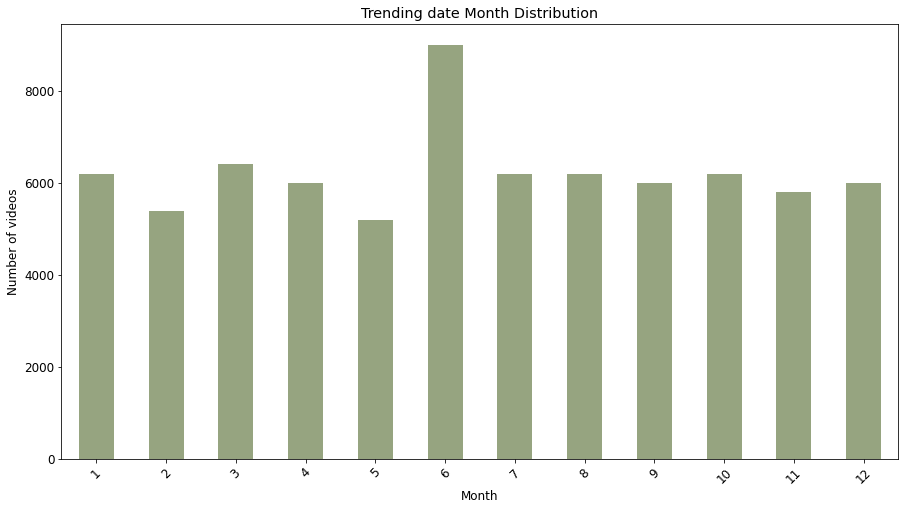

In [13]:
plt.figure(figsize = (15,8))
p = us_2021_data['trending_date'].dt.month.value_counts().sort_index().plot(kind='bar', color ='#96A480')
plt.title('Trending date Month Distribution')
for item in plt.gca().get_xticklabels():
    item.set_rotation(45)
plt.xlabel('Month')
plt.ylabel('Number of videos')

We could clearly see that **June** is the month having highest number of videos.

One interesting observation is that each of the months before June 2021 has **slightly lower** number of videos compared to each of the months after June 2021

Let's have a more closer look at the data, say every day in 2021

(150.0, 450.0)

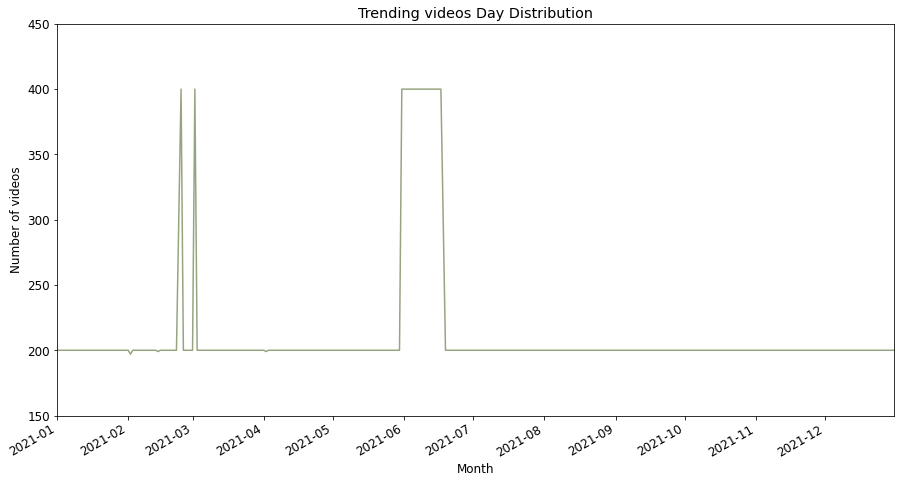

In [14]:
plt.figure(figsize = (15,8))
us_2021_data['trending_date'].value_counts().sort_index().plot(color='#96A480')
plt.title('Trending videos Day Distribution')
plt.xlabel('Month')
plt.ylabel('Number of videos')
ax = plt.gca()
ax.set_xlim(['2021-01-01','2021-12-31'])
ax.set_ylim([150,450])

The underlying trend is clearly visible now. It shows that:
* There are tiny decreases in February and April
* There are a big jump in number of videos from late February to early March and from end of May to mid of June

**Question:** Which time periods correspond to the highest and lowest peaks in the plot?

In [15]:
us_2021_data['trending_date'].value_counts()

2021-06-16 00:00:00+00:00    400
2021-06-07 00:00:00+00:00    400
2021-06-14 00:00:00+00:00    400
2021-06-13 00:00:00+00:00    400
2021-06-12 00:00:00+00:00    400
                            ... 
2021-04-24 00:00:00+00:00    200
2021-04-23 00:00:00+00:00    200
2021-04-02 00:00:00+00:00    199
2021-02-14 00:00:00+00:00    199
2021-02-02 00:00:00+00:00    197
Name: trending_date, Length: 353, dtype: int64

As observed from the plot and the data above, we have more details about the data:
* The highest number of trending videos in one day is 400 videos in from late February to early March and around mid of June
* The lowest number of trending videos in one day is 197-199 videos in early February

**Rearranging dataset for date and month analysis**

In [16]:
#Separating the date to another column
us_2021_data['Date'] = us_2021_data['trending_date'].dt.day
us_2021_data['Date']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


27596      1
27597      1
27598      1
27599      1
27600      1
          ..
102186    31
102187    31
102188    31
102189    31
102190    31
Name: Date, Length: 74595, dtype: int64

In [17]:
#Separating the month to another column
us_2021_data['Month'] = us_2021_data['trending_date'].dt.month
us_2021_data['Month']
us_2021_data

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,Date,Month
27596,2IQ4Kr-SnU0,The Stunning Conclusion to an Amazing Tribute ...,2020-12-31 03:58:51+00:00,UCFN4JkGP_bVhAdBsoV9xftA,All Elite Wrestling,24,2021-01-01 00:00:00+00:00,All Elite Wrestling|AEW|The Young Bucks|Cody R...,2032920,78122,1329,6034,https://i.ytimg.com/vi/2IQ4Kr-SnU0/default.jpg,False,False,#AEW #AllEliteWrestlingAEW Dynamite airs every...,1,1
27597,p19cjKg8dIc,goodbye california. a new chapter.,2020-12-30 16:58:08+00:00,UCcgVECVN4OKV6DH1jLkqmcA,Jake Paul,22,2021-01-01 00:00:00+00:00,jake paul,3760339,98307,40685,20026,https://i.ytimg.com/vi/p19cjKg8dIc/default.jpg,False,False,new chapter...text me im bored - 310-870-3349🔴...,1,1
27598,wW-KBzKWvrU,Concerning the Wendigo doll: An Apology,2020-12-31 09:16:45+00:00,UCitKV0ebZVbtU2nIPihDGMQ,Dollightful,24,2021-01-01 00:00:00+00:00,[None],1548097,0,0,0,https://i.ytimg.com/vi/wW-KBzKWvrU/default.jpg,True,True,"References:Barnouw, Victor. 1977. Wisconsin Ch...",1,1
27599,fn3KWM1kuAw,Do You Love Me?,2020-12-29 18:51:48+00:00,UC7vVhkEfw4nOGp8TyDk7RcQ,Boston Dynamics,28,2021-01-01 00:00:00+00:00,Boston Dynamics|Robots|Dynamic Balance|Dancing...,16682361,635149,13725,90621,https://i.ytimg.com/vi/fn3KWM1kuAw/default.jpg,False,False,Our whole crew got together to celebrate the s...,1,1
27600,nlGllxnSfgA,"AMONG US W/ CORPSE, JAMES, ADDISON, BRETMAN, K...",2020-12-30 04:37:38+00:00,UCt_DaLB_NDqPVxezyvcfRtg,LARRAY,22,2021-01-01 00:00:00+00:00,LARRAY,2812174,112899,2655,5870,https://i.ytimg.com/vi/nlGllxnSfgA/default.jpg,False,False,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102186,t29DXaeg5XY,4 Reason Why We Chose The Ram Promaster #shorts,2021-12-22 20:31:23+00:00,UCML5X57ww98rWq2G9jAPPDQ,SUNNY LUNA LIVING,22,2021-12-31 00:00:00+00:00,van life|vanlife|rampromaster|van conversion|b...,2129251,187229,0,1355,https://i.ytimg.com/vi/t29DXaeg5XY/default.jpg,False,False,Here are the top four reasons why we chose the...,31,12
102187,6OVR0MFOOAI,The Top Ten Worst Hit Songs of 2021,2021-12-22 07:52:54+00:00,UCaTSjmqzOO-P8HmtVW3t7sA,Todd in the Shadows,22,2021-12-31 00:00:00+00:00,todd in the shadows|todd's pop song reviews|po...,469418,31281,0,5548,https://i.ytimg.com/vi/6OVR0MFOOAI/default.jpg,False,False,Go to http://curiositystream.com/toddintheshad...,31,12
102188,4PHGAPMdrAo,I Built a Real Life Fortnite Battle Bus!,2021-12-22 01:40:54+00:00,UCR_J_SntqJh5eXw66d5hJxA,Matthew Beem,22,2021-12-31 00:00:00+00:00,mbeem10|matthew beem|beem team|fortnite|chapte...,1754987,69730,0,2960,https://i.ytimg.com/vi/4PHGAPMdrAo/default.jpg,False,False,In this video I built a real life Fortnite Bat...,31,12
102189,CRZig-WX_U8,Mary J. Blige - Amazing (feat. DJ Khaled) [Off...,2021-12-21 15:00:10+00:00,UCj5CgwX_iJEqJsqUJyYjg4A,Mary J Blige,10,2021-12-31 00:00:00+00:00,Mary J. Blige|dj khaled|dj khaled mary j blige...,1699496,61430,0,4543,https://i.ytimg.com/vi/CRZig-WX_U8/default.jpg,False,False,The official video for Mary J. Blige's Amazing...,31,12


In [18]:
us_month_data = us_2021_data.groupby(['Month','Date']).count()['trending_date']
us_month_data

Month  Date
1      1       200
       2       200
       3       200
       4       200
       5       200
              ... 
12     27      200
       28      200
       29      200
       30      200
       31      200
Name: trending_date, Length: 353, dtype: int64

In [19]:
#Unstacking data to create a heatmap
us_month_data= us_month_data.unstack(level = 0)
us_month_data

Month,1,2,3,4,5,6,7,8,9,10,11,12
Date,,,,,,,,,,,,
1,200.0,200.0,200.0,200.0,200.0,400.0,200.0,200.0,200.0,200.0,200.0,200.0
2,200.0,197.0,400.0,199.0,200.0,400.0,200.0,200.0,200.0,200.0,200.0,200.0
3,200.0,200.0,200.0,200.0,200.0,400.0,200.0,200.0,200.0,200.0,200.0,200.0
4,200.0,200.0,200.0,200.0,200.0,400.0,200.0,200.0,200.0,200.0,200.0,NaN
5,200.0,200.0,200.0,200.0,200.0,400.0,200.0,200.0,200.0,200.0,200.0,200.0
6,200.0,200.0,200.0,200.0,200.0,400.0,200.0,200.0,200.0,200.0,200.0,200.0
7,200.0,200.0,200.0,200.0,200.0,400.0,200.0,200.0,200.0,200.0,200.0,200.0
8,200.0,200.0,200.0,200.0,200.0,400.0,200.0,200.0,200.0,200.0,200.0,200.0
9,200.0,200.0,200.0,200.0,200.0,400.0,200.0,200.0,200.0,200.0,200.0,200.0


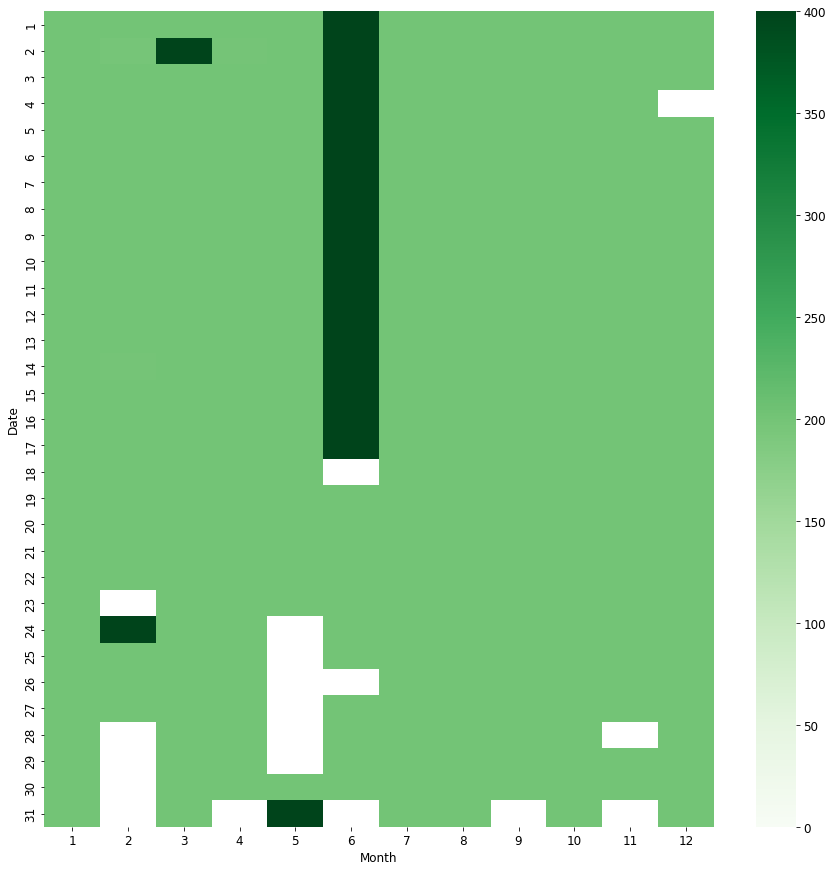

In [20]:
plt.figure(figsize = (15,15))
sns.heatmap(us_month_data, vmin = 0, cmap='Greens')
plt.title = 'Heatmap of trending video counts in day vs month grid'
plt.show()

The heatmap indicates that the maximum number of videos occured specifically on **2/24, 3/2, and from 5/31 to 6/17**

We can also tell why February being the month having lowest number of trending videos is because it has the least number of days (NaN values)

# Explore YouTube channels performance

In [21]:
#Counting total number of videos trending in 2021
index = us_data.index
number_of_rows = len(index)
print("There are total {0}".format(number_of_rows) + " videos on trending in 2021")

#Counting total number of DISTINCT channel trending in 2021
print("There are {0}".format(us_data['channelTitle'].nunique()) + " channels on trending in 2021")

There are total 118191 videos on trending in 2021
There are 5441 channels on trending in 2021


This results show that there are many YouTube channels that stay on trending more than one time.

In [22]:
#Creating a new video count dataframe 
us_channel = us_data['channelTitle'].value_counts()
us_channel = pd.DataFrame(us_channel).reset_index()
us_channel = us_channel.rename(columns = {'channelTitle': 'video_counts', 'index':'channelTitle'})
us_channel

,channelTitle,video_counts
0,NFL,820
1,NBA,693
2,SSSniperWolf,549
3,MrBeast Gaming,421
4,SSundee,410
...,...,...
5436,FOX,1
5437,Olivia Rodrigo - Topic,1
5438,Chaos Club,1
5439,Levi's®,1


**Question:** Which channel stay on trending the most in 2021?

In [23]:
#Counting number of videos on trending of each YouTube channel
print("Number of times on Youtube trending for each YouTube channel are:\n{0}".format(us_data['channelTitle'].value_counts()))

Number of times on Youtube trending for each YouTube channel are:
NFL                       820
NBA                       693
SSSniperWolf              549
MrBeast Gaming            421
SSundee                   410
                         ... 
FOX                         1
Olivia Rodrigo - Topic      1
Chaos Club                  1
Levi's®                     1
SmugStick                   1
Name: channelTitle, Length: 5441, dtype: int64


**Question:** How many channels hit the trending on YouTube twice or more in 2021? 

Let's call them **potential channels**

In [24]:
#Select channels stayed on trending for 2 or more days in 2021
us_potential_channel = us_channel[us_channel['video_counts'] >=2]
us_potential_channel
index = us_potential_channel.index
num_of_channel = len(index)
print("There are {0} ".format(num_of_channel) + "potential channels in 2021 and they are\n{0}".format(us_potential_channel))

There are 5396 potential channels in 2021 and they are
                   channelTitle  video_counts
0                           NFL           820
1                           NBA           693
2                  SSSniperWolf           549
3                MrBeast Gaming           421
4                       SSundee           410
...                         ...           ...
5391             GunsNRosesVEVO             2
5392  Nick's Strength and Power             2
5393                   RB Music             2
5394    Vinesauce: Twitch Clips             2
5395                Tierra Cali             2

[5396 rows x 2 columns]


How about channels that hit the trending only one time? Let's call them **one time channels**

**Question:** How many one time channel are there?

In [25]:
us_one_time_channel = us_channel[us_channel['video_counts'] == 1]
us_one_time_channel
index = us_one_time_channel.index
num_of_channel = len(index)
print("There are {0}".format(num_of_channel) + " one-time channels in 2021 and they are\n{0}".format(us_one_time_channel))

There are 45 one-time channels in 2021 and they are
                     channelTitle  video_counts
5396                    RADIO.COM             1
5397          Paradox Interactive             1
5398             Republic Records             1
5399            Trump White House             1
5400             The Royal Family             1
5401                 Marc Anthony             1
5402                     Roadshow             1
5403                 Richa sarkar             1
5404                  PeteyTVprof             1
5405         Supper Smart Channel             1
5406  TheCampingRusher - Fortnite             1
5407           Ethan Funny Family             1
5408              cashewlover1905             1
5409                Steve n kayla             1
5410                       iFL TV             1
5411                Natanael Cano             1
5412                         Mork             1
5413                     Galantis             1
5414                NEEDTOBREATHE   

Besides, we could see that there are several YouTube channel that stayed on trending more than 365 times, which means that these channels had more than two videos stay on trending in the same day. Let's call them **viral channels**

**Question:** Which and How many viral channels are there?

In [26]:
#Select only channel having 365 or more video count
us_viral_channel = us_channel[us_channel['video_counts'] >= 365]
us_viral_channel
index = us_viral_channel.index
num_of_channel = len(index)
print("There are {0}".format(num_of_channel) + " viral channels in 2021 and they are\n{0}".format(us_viral_channel))

There are 7 viral channels in 2021 and they are
     channelTitle  video_counts
0             NFL           820
1             NBA           693
2    SSSniperWolf           549
3  MrBeast Gaming           421
4         SSundee           410
5            ESPN           377
6         MrBeast           368
